In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from matplotlib.ticker import FuncFormatter
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.utils import to_categorical

In [2]:
app=pd.read_csv("D:\\app_project\\Google-Playstore.csv")
app.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [3]:
app.nunique()

App Name             2177943
App Id               2312944
Category                  48
Rating                    42
Rating Count           38482
Installs                  22
Minimum Installs          22
Maximum Installs      251563
Free                       2
Price                   1063
Currency                  15
Size                    1657
Minimum Android          154
Developer Id          758371
Developer Website     810440
Developer Email       950456
Released                4158
Last Updated            3918
Content Rating             6
Privacy Policy        977743
Ad Supported               2
In App Purchases           2
Editors Choice             2
Scraped Time           67374
dtype: int64

In [4]:
app['Rating'].value_counts(ascending=False)

Rating
0.0    1059762
5.0     100122
4.2      87993
4.4      86304
4.3      83276
4.6      78302
4.5      76753
4.1      69723
4.0      67342
4.7      62205
4.8      61109
3.9      55684
3.8      53863
4.9      44524
3.7      43300
3.6      35989
3.5      31636
3.4      28908
3.3      22613
3.2      21485
3.0      17275
3.1      15539
2.8      12235
2.9      11522
2.6       9213
2.7       9200
2.5       6942
2.4       6051
2.3       5414
2.2       4954
2.0       3804
2.1       3675
1.8       2957
1.9       2588
1.7       1928
1.6       1644
1.5       1157
1.4       1011
1.0        713
1.3        579
1.2        531
1.1        236
Name: count, dtype: int64

In [5]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [6]:
app.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [7]:
app.isnull().sum()

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [8]:
app.duplicated().sum()

0

In [9]:
# Released and Last_Update Anomalies
(len(app[app["Released"]>app["Last Updated"]])/len(app))*100

43.754107319502765

In [10]:
# As their percentage is very small,
#  so I deided to keep only those entries where released date is less than last updated date.
app=app[app["Released"]<app["Last Updated"]]

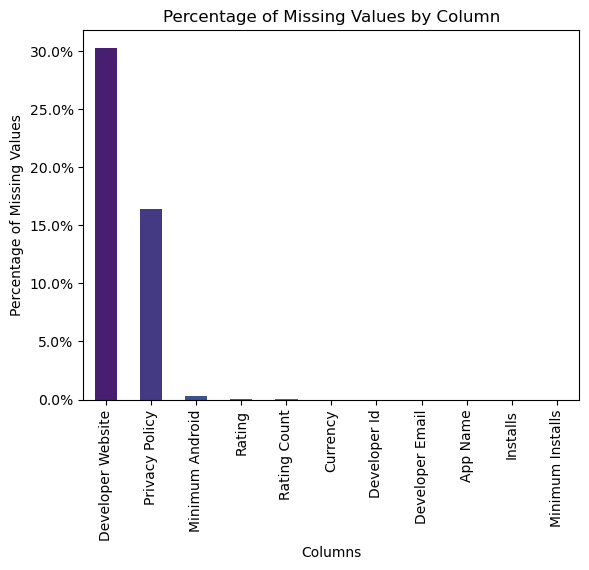

In [11]:
null_columns = app.isnull().sum()
null_percentage = (null_columns / len(app)) * 100
null_percentage = null_percentage[null_columns > 0]
mm=null_percentage.sort_values(ascending=False)
colors = sns.color_palette("viridis", len(mm))
ax=mm.plot.bar(color=colors)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))



In [12]:
app.drop(['App Id','Developer Id','Developer Website','Free'
          ,'Developer Email','Privacy Policy','Scraped Time'],axis=1,inplace=True)
app.head(5)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,0.0,USD,6.2M,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,0.0,USD,2.5M,4.1 and up,"Sep 23, 2019","Sep 27, 2019",Everyone,True,False,False
11,Parents,Maps & Navigation,0.0,0.0,100+,100.0,330,0.0,USD,2.7M,4.0 and up,"Jan 10, 2018","Jun 27, 2018",Everyone,False,False,False
12,桃園機場捷運時刻表 - 捷運轉乘路線快速查詢(支援台北捷運),Travel & Local,3.9,118.0,"10,000+",10000.0,37763,0.0,USD,7.6M,4.2 and up,"Apr 3, 2018","Jun 11, 2021",Everyone,True,False,False
13,be.MOBILISED,Maps & Navigation,0.0,0.0,100+,100.0,274,0.0,USD,15M,6.0 and up,"Feb 9, 2020","May 14, 2021",Everyone,False,False,False


In [13]:
null_columns = app.isnull().sum()
for x in null_columns.index:
# Drop null values at 'app' dataset
 app = app.dropna(subset=[x])

app


,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,0.00,USD,6.2M,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,0.00,USD,2.5M,4.1 and up,"Sep 23, 2019","Sep 27, 2019",Everyone,True,False,False
11,Parents,Maps & Navigation,0.0,0.0,100+,100.0,330,0.00,USD,2.7M,4.0 and up,"Jan 10, 2018","Jun 27, 2018",Everyone,False,False,False
12,桃園機場捷運時刻表 - 捷運轉乘路線快速查詢(支援台北捷運),Travel & Local,3.9,118.0,"10,000+",10000.0,37763,0.00,USD,7.6M,4.2 and up,"Apr 3, 2018","Jun 11, 2021",Everyone,True,False,False
13,be.MOBILISED,Maps & Navigation,0.0,0.0,100+,100.0,274,0.00,USD,15M,6.0 and up,"Feb 9, 2020","May 14, 2021",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312925,GOKarli Carrera Rennbahn und Dart Onlineshop,Shopping,0.0,0.0,"1,000+",1000.0,2418,0.00,USD,9.4M,6.0 and up,"Feb 10, 2020","May 28, 2021",Everyone,False,False,False
2312926,Asset Data Collection,Business,0.0,0.0,500+,500.0,687,0.00,USD,3.3M,5.0 and up,"Dec 13, 2018","Mar 24, 2021",Everyone,False,False,False
2312927,Gear Ratio Calculator,Sports,0.0,0.0,100+,100.0,201,2.49,USD,994k,2.1 and up,"Jun 19, 2012","Nov 09, 2012",Everyone,False,False,False
2312935,Floral Wallpaper,Personalization,0.0,0.0,"1,000+",1000.0,1302,0.00,USD,29M,4.1 and up,"Jul 19, 2018","Nov 13, 2019",Everyone,True,False,False


In [14]:
app.shape

(892492, 17)

In [15]:
null_columns = app.isnull().sum()
null_columns =null_columns[null_columns>0]
df=pd.DataFrame({'null_columns':null_columns,"type":app[null_columns.index].dtypes})
df

,null_columns,type


# convert object columns that contain numbers to numerical coulmns


In [16]:
# 1----> Installs

app['Installs'] = app['Installs'].str.replace(',', '')  # إزالة الفواصل
app['Installs'] = app['Installs'].str.replace('+', '')  # إزالة علامة +
app['Installs'] = pd.to_numeric(app['Installs'], errors='coerce')          # تحويل إلى int


In [17]:
# Function to convert 'Size' to numeric
def convert_size(size):
    if isinstance(size, str):
        size = size.replace(',', '')  # Remove commas
        if 'M' in size:
            return float(size.replace('M', '').strip()) * 1024 * 1024 # (1 Mb =1024 kilobytes, and 1 kilobyte = 1024 bytes)
        elif 'k' in size:
            return float(size.replace('k', '').strip()) * 1024       #(1 kilobyte = 1024 bytes)
        elif size == 'Varies with device':
            return None  # Handle 'Varies with device' case
        else:
            return None  # Handle unexpected formats
    return None  # Handle non-string cases

# Apply the conversion function to the 'Size' column
app['Size'] = app['Size'].apply(convert_size)
app['Size'] = pd.to_numeric(app['Size'], errors='coerce')

In [18]:
app['Size'].value_counts(ascending=False)

Size
11534336.0     24499
12582912.0     22797
13631488.0     18912
14680064.0     18448
16777216.0     16985
               ...  
606076928.0        1
466616320.0        1
306184192.0        1
920649728.0        1
303038464.0        1
Name: count, Length: 1532, dtype: int64

In [19]:
app['Minimum Installs'] = app['Minimum Installs'].replace({',': '', '\+': ''}, regex=True)
app['Minimum Installs'] = pd.to_numeric(app['Minimum Installs'], errors='coerce')

In [20]:
app['Released'] = pd.to_datetime(app['Released'], errors='coerce')

# استخراج الميزات من التاريخ
app['YearOfReleased'] = app['Released'].dt.year
app['MonthOfReleased'] = app['Released'].dt.month
app['DayOfReleased'] = app['Released'].dt.day
app = app.drop(columns=['Released'])
app

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,YearOfReleased,MonthOfReleased,DayOfReleased
4,GROW.me,Tools,0.0,0.0,100,100.0,478,0.00,USD,6501171.2,4.1 and up,"Nov 12, 2018",Everyone,False,False,False,2020,2,21
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,1000,1000.0,2567,0.00,USD,2621440.0,4.1 and up,"Sep 27, 2019",Everyone,True,False,False,2019,9,23
11,Parents,Maps & Navigation,0.0,0.0,100,100.0,330,0.00,USD,2831155.2,4.0 and up,"Jun 27, 2018",Everyone,False,False,False,2018,1,10
12,桃園機場捷運時刻表 - 捷運轉乘路線快速查詢(支援台北捷運),Travel & Local,3.9,118.0,10000,10000.0,37763,0.00,USD,7969177.6,4.2 and up,"Jun 11, 2021",Everyone,True,False,False,2018,4,3
13,be.MOBILISED,Maps & Navigation,0.0,0.0,100,100.0,274,0.00,USD,15728640.0,6.0 and up,"May 14, 2021",Everyone,False,False,False,2020,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312925,GOKarli Carrera Rennbahn und Dart Onlineshop,Shopping,0.0,0.0,1000,1000.0,2418,0.00,USD,9856614.4,6.0 and up,"May 28, 2021",Everyone,False,False,False,2020,2,10
2312926,Asset Data Collection,Business,0.0,0.0,500,500.0,687,0.00,USD,3460300.8,5.0 and up,"Mar 24, 2021",Everyone,False,False,False,2018,12,13
2312927,Gear Ratio Calculator,Sports,0.0,0.0,100,100.0,201,2.49,USD,1017856.0,2.1 and up,"Nov 09, 2012",Everyone,False,False,False,2012,6,19
2312935,Floral Wallpaper,Personalization,0.0,0.0,1000,1000.0,1302,0.00,USD,30408704.0,4.1 and up,"Nov 13, 2019",Everyone,True,False,False,2018,7,19


In [21]:
app['Last Updated'] = pd.to_datetime(app['Last Updated'], errors='coerce')

# استخراج الميزات من التاريخ
app['YearOfUpdated'] = app['Last Updated'].dt.year
app['MonthOfUpdated'] = app['Last Updated'].dt.month
app['DayOfUpdated'] = app['Last Updated'].dt.day
app = app.drop(columns=['Last Updated'])
app

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,...,Content Rating,Ad Supported,In App Purchases,Editors Choice,YearOfReleased,MonthOfReleased,DayOfReleased,YearOfUpdated,MonthOfUpdated,DayOfUpdated
4,GROW.me,Tools,0.0,0.0,100,100.0,478,0.00,USD,6501171.2,...,Everyone,False,False,False,2020,2,21,2018,11,12
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,1000,1000.0,2567,0.00,USD,2621440.0,...,Everyone,True,False,False,2019,9,23,2019,9,27
11,Parents,Maps & Navigation,0.0,0.0,100,100.0,330,0.00,USD,2831155.2,...,Everyone,False,False,False,2018,1,10,2018,6,27
12,桃園機場捷運時刻表 - 捷運轉乘路線快速查詢(支援台北捷運),Travel & Local,3.9,118.0,10000,10000.0,37763,0.00,USD,7969177.6,...,Everyone,True,False,False,2018,4,3,2021,6,11
13,be.MOBILISED,Maps & Navigation,0.0,0.0,100,100.0,274,0.00,USD,15728640.0,...,Everyone,False,False,False,2020,2,9,2021,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312925,GOKarli Carrera Rennbahn und Dart Onlineshop,Shopping,0.0,0.0,1000,1000.0,2418,0.00,USD,9856614.4,...,Everyone,False,False,False,2020,2,10,2021,5,28
2312926,Asset Data Collection,Business,0.0,0.0,500,500.0,687,0.00,USD,3460300.8,...,Everyone,False,False,False,2018,12,13,2021,3,24
2312927,Gear Ratio Calculator,Sports,0.0,0.0,100,100.0,201,2.49,USD,1017856.0,...,Everyone,False,False,False,2012,6,19,2012,11,9
2312935,Floral Wallpaper,Personalization,0.0,0.0,1000,1000.0,1302,0.00,USD,30408704.0,...,Everyone,True,False,False,2018,7,19,2019,11,13


In [22]:
print(app[['DayOfReleased', 'Rating']].corr())
print(app[['MonthOfReleased', 'Rating']].corr())
print(app[['YearOfReleased', 'Rating']].corr())

               DayOfReleased    Rating
DayOfReleased       1.000000 -0.040081
Rating             -0.040081  1.000000
                 MonthOfReleased    Rating
MonthOfReleased         1.000000 -0.001403
Rating                 -0.001403  1.000000
                YearOfReleased    Rating
YearOfReleased        1.000000 -0.225478
Rating               -0.225478  1.000000


In [23]:
print(app[['YearOfUpdated', 'Rating']].corr())
print(app[['MonthOfUpdated', 'Rating']].corr())
print(app[['DayOfUpdated', 'Rating']].corr())

               YearOfUpdated    Rating
YearOfUpdated       1.000000 -0.022096
Rating             -0.022096  1.000000
                MonthOfUpdated    Rating
MonthOfUpdated        1.000000  0.008327
Rating                0.008327  1.000000
              DayOfUpdated    Rating
DayOfUpdated      1.000000 -0.046223
Rating           -0.046223  1.000000


In [24]:
app = app.drop(columns=['DayOfReleased','MonthOfUpdated','DayOfUpdated'],axis=1)

In [25]:
null_columns = app.isnull().sum()
null_columns =null_columns[null_columns>0]
df=pd.DataFrame({'null_columns':null_columns,"type":app[null_columns.index].dtypes})
app[null_columns.index].describe()

,Size
count,8.695140e+05
mean,2.090872e+07
std,2.611503e+07
min,3.481600e+03
25%,5.347738e+06
50%,1.153434e+07
75%,2.726298e+07
max,1.069548e+09


In [26]:
for x in null_columns.index:
# إزالة الصفوف التي تحتوي على قيم فارغة في عمود التارجيت
 app = app.dropna(subset=[x])

app


,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice,YearOfReleased,MonthOfReleased,YearOfUpdated
4,GROW.me,Tools,0.0,0.0,100,100.0,478,0.00,USD,6501171.2,4.1 and up,Everyone,False,False,False,2020,2,2018
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,1000,1000.0,2567,0.00,USD,2621440.0,4.1 and up,Everyone,True,False,False,2019,9,2019
11,Parents,Maps & Navigation,0.0,0.0,100,100.0,330,0.00,USD,2831155.2,4.0 and up,Everyone,False,False,False,2018,1,2018
12,桃園機場捷運時刻表 - 捷運轉乘路線快速查詢(支援台北捷運),Travel & Local,3.9,118.0,10000,10000.0,37763,0.00,USD,7969177.6,4.2 and up,Everyone,True,False,False,2018,4,2021
13,be.MOBILISED,Maps & Navigation,0.0,0.0,100,100.0,274,0.00,USD,15728640.0,6.0 and up,Everyone,False,False,False,2020,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312925,GOKarli Carrera Rennbahn und Dart Onlineshop,Shopping,0.0,0.0,1000,1000.0,2418,0.00,USD,9856614.4,6.0 and up,Everyone,False,False,False,2020,2,2021
2312926,Asset Data Collection,Business,0.0,0.0,500,500.0,687,0.00,USD,3460300.8,5.0 and up,Everyone,False,False,False,2018,12,2021
2312927,Gear Ratio Calculator,Sports,0.0,0.0,100,100.0,201,2.49,USD,1017856.0,2.1 and up,Everyone,False,False,False,2012,6,2012
2312935,Floral Wallpaper,Personalization,0.0,0.0,1000,1000.0,1302,0.00,USD,30408704.0,4.1 and up,Everyone,True,False,False,2018,7,2019


In [27]:
null_columns = app.isnull().sum()
# null_columns =null_columns[null_columns>0]
df=pd.DataFrame({'null_columns':null_columns,"type":app[null_columns.index].dtypes})
df

,null_columns,type
App Name,0,object
Category,0,object
Rating,0,float64
Rating Count,0,float64
Installs,0,int64
Minimum Installs,0,float64
Maximum Installs,0,int64
Price,0,float64
Currency,0,object
Size,0,float64


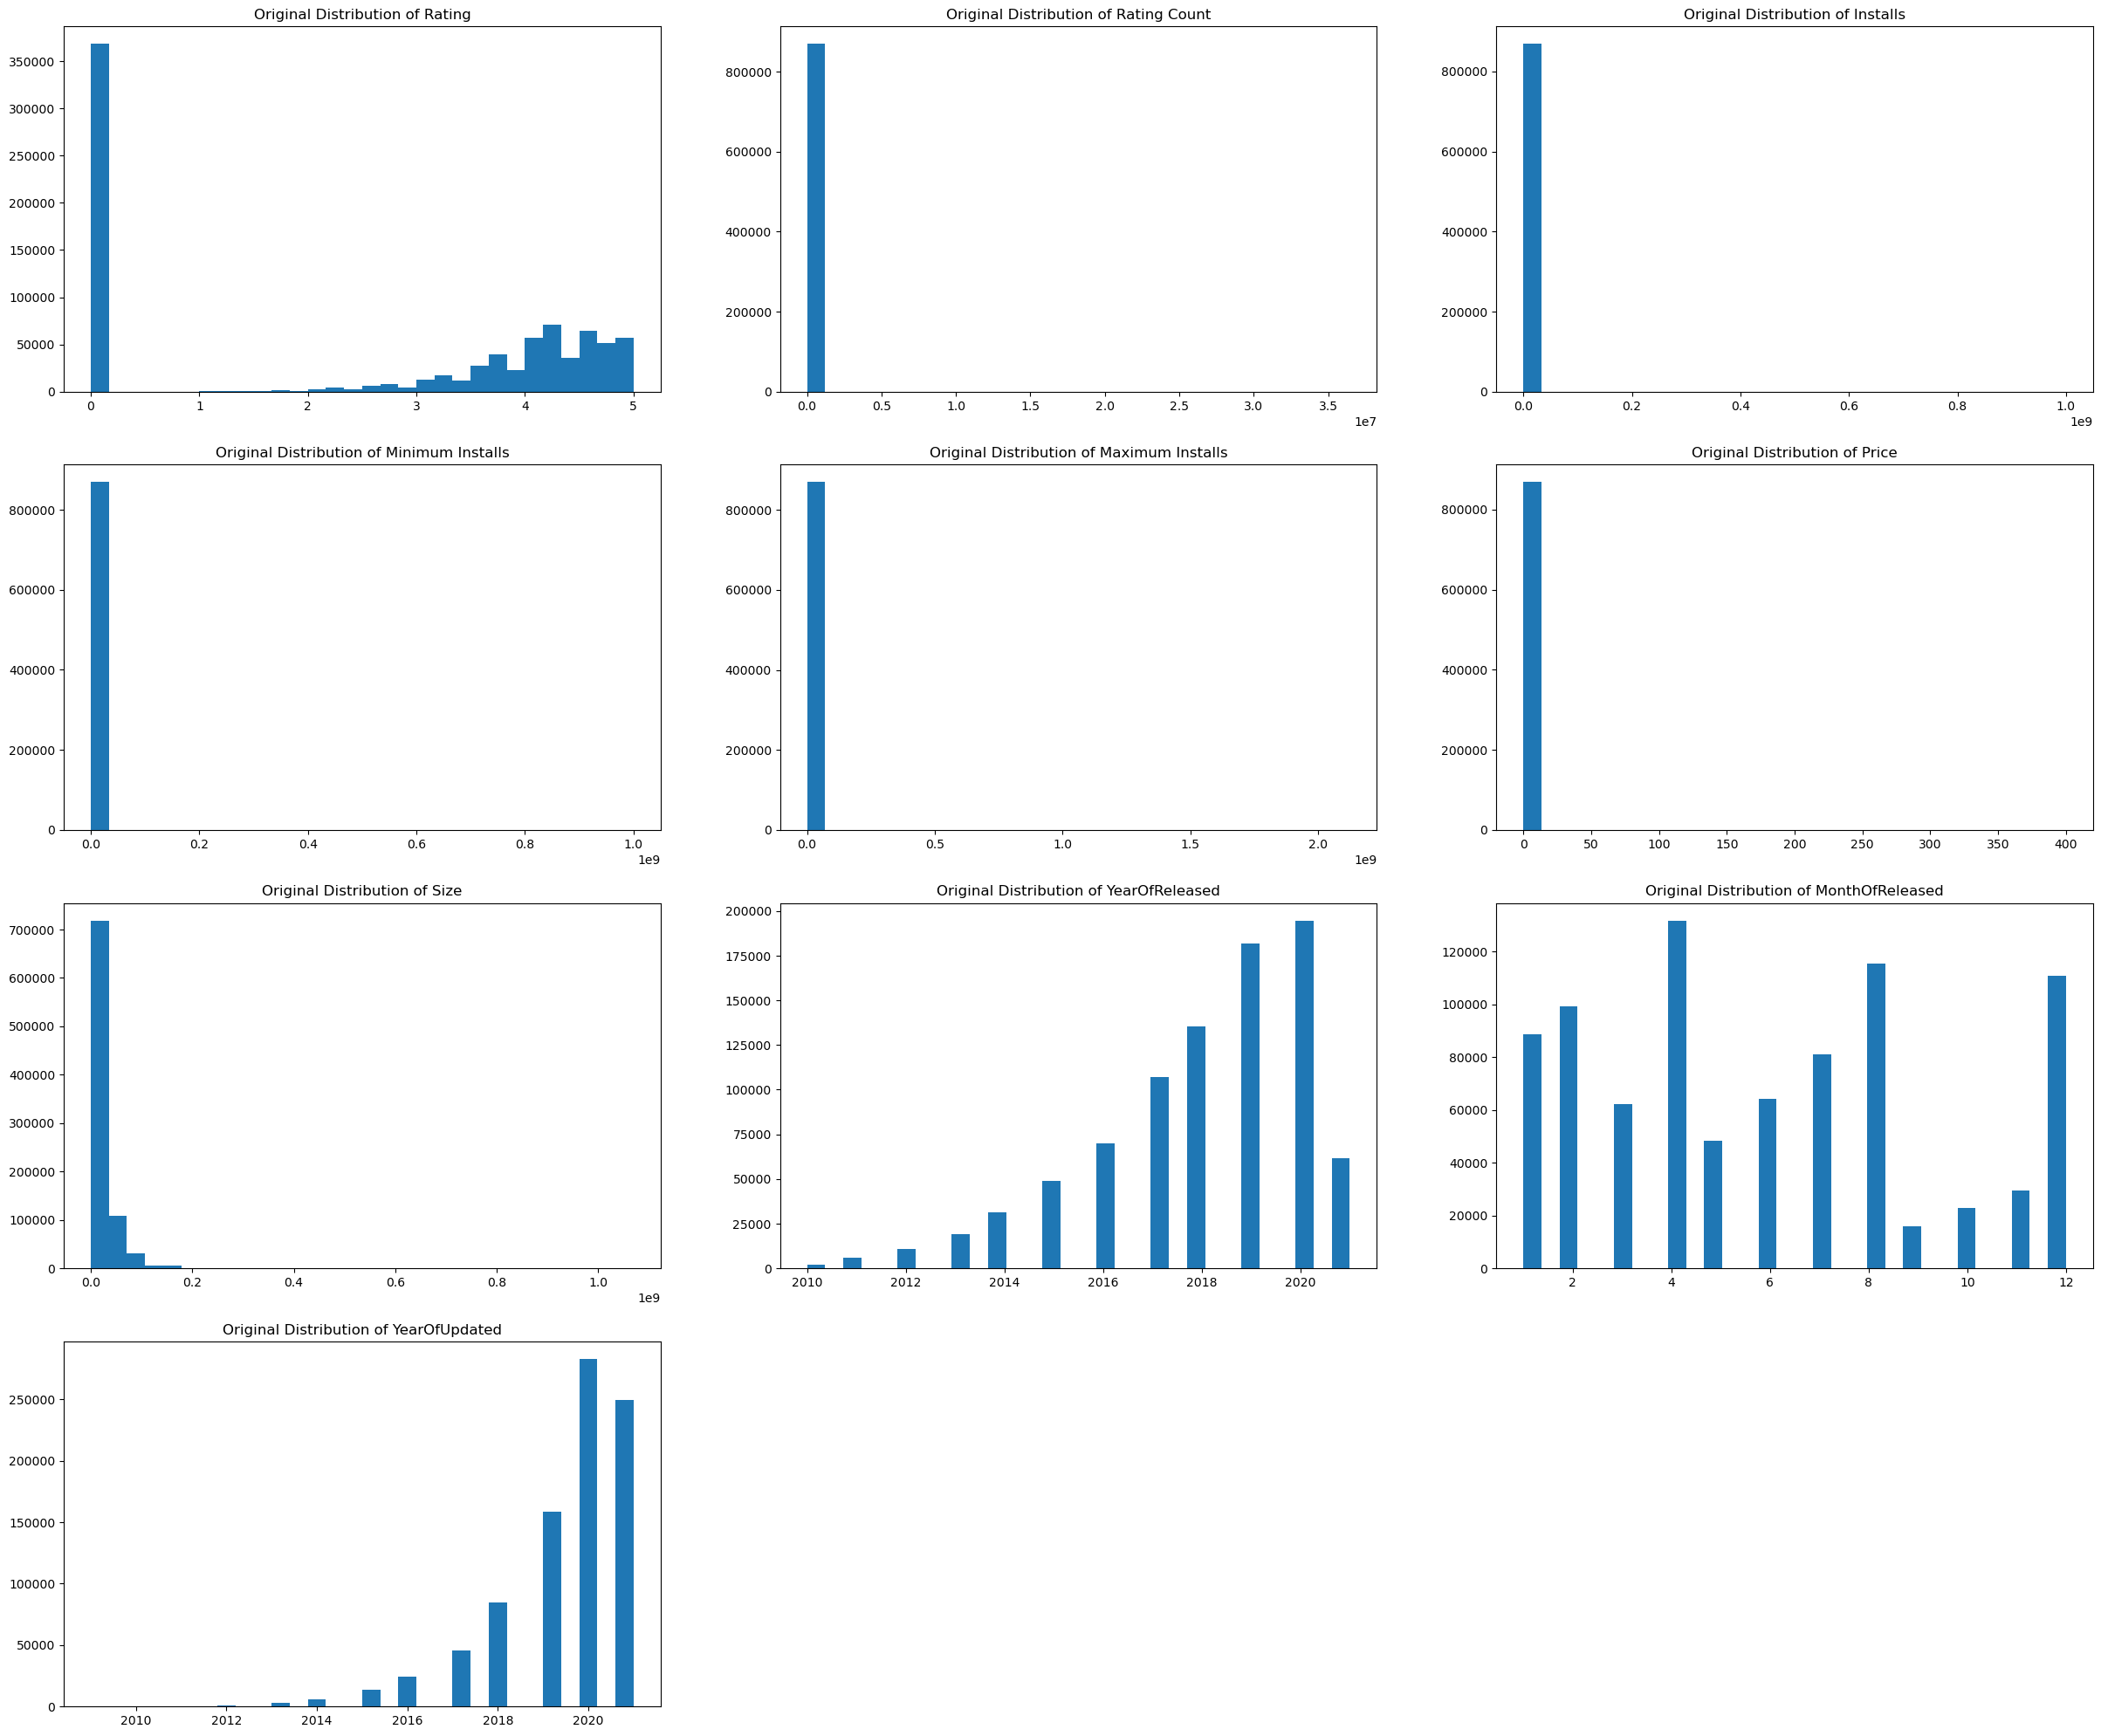

In [28]:
col3=app.select_dtypes('number').columns
plt.figure(figsize=(30,25))
for i , col in enumerate(col3):
 plt.subplot(4,3,i+1)
 plt.hist(app[col], bins=30)
 plt.title(f'Original Distribution of {col}')
plt.show()


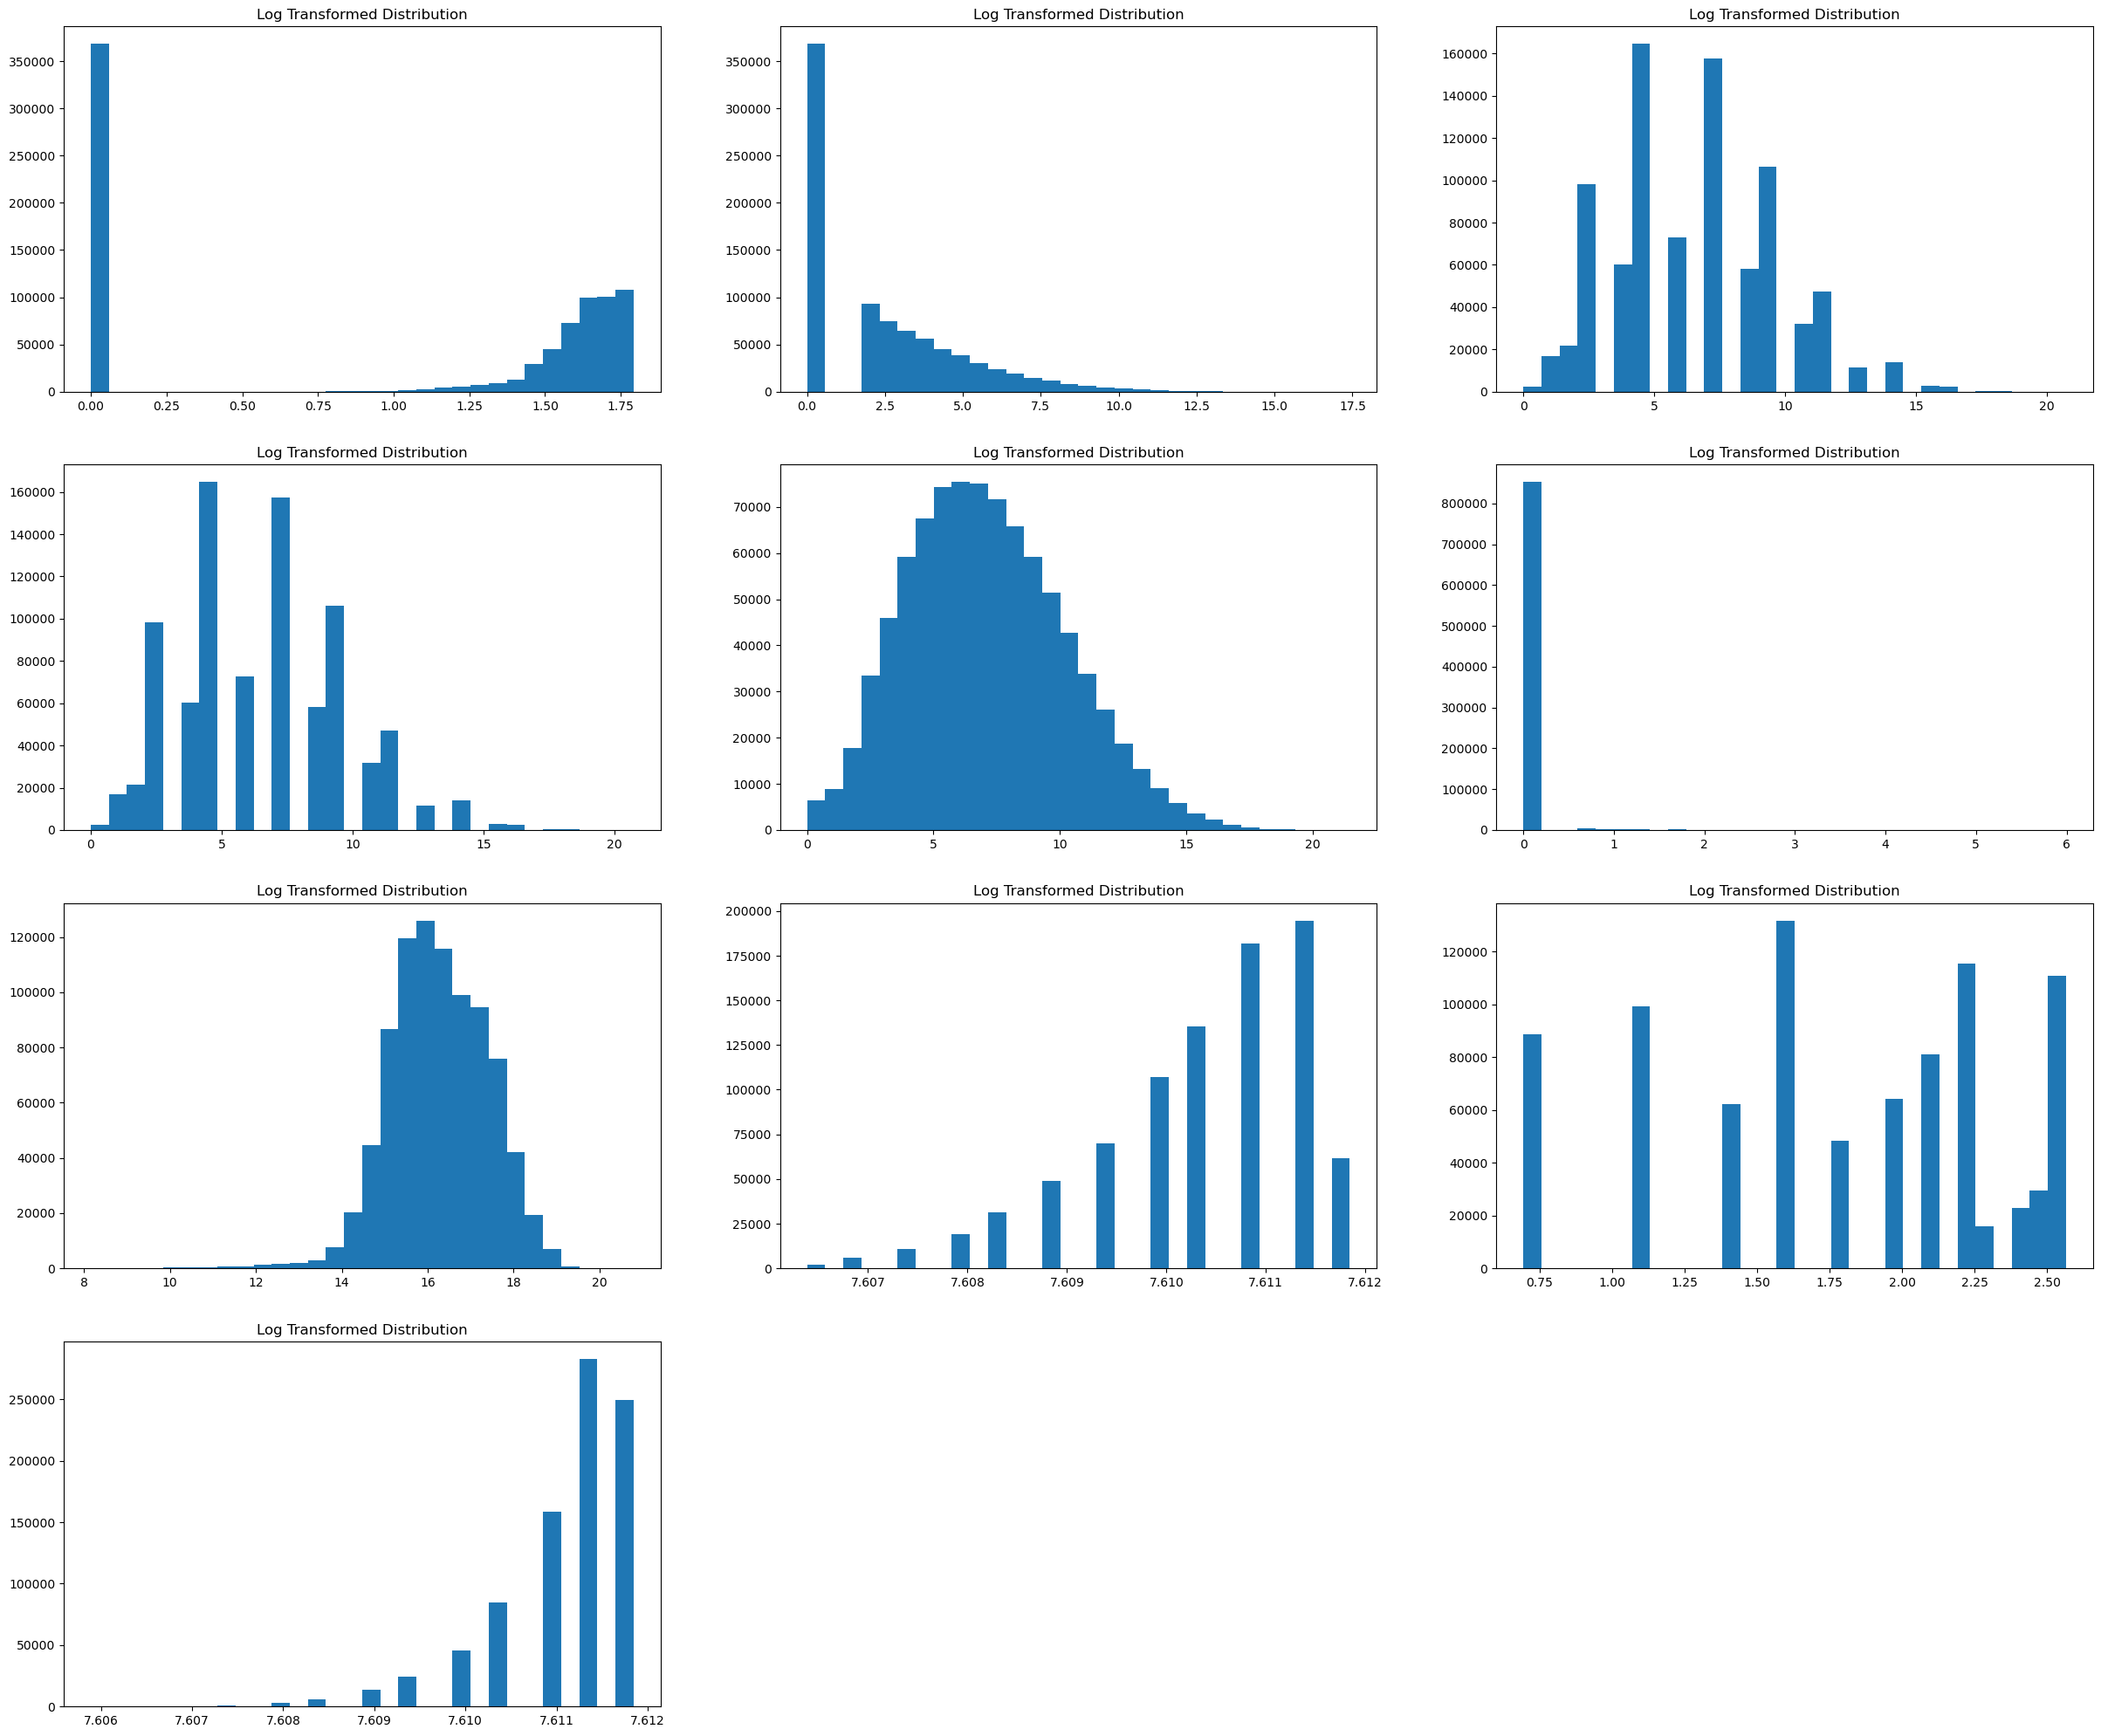

In [29]:
# رسم البيانات بعد التحويل
col3=app.select_dtypes('number').columns
plt.figure(figsize=(30,25))
for i , col in enumerate(col3):
 plt.subplot(4,3,i+1)
 plt.hist(np.log1p(app[col]), bins=30)
 plt.title('Log Transformed Distribution')

plt.show()

10


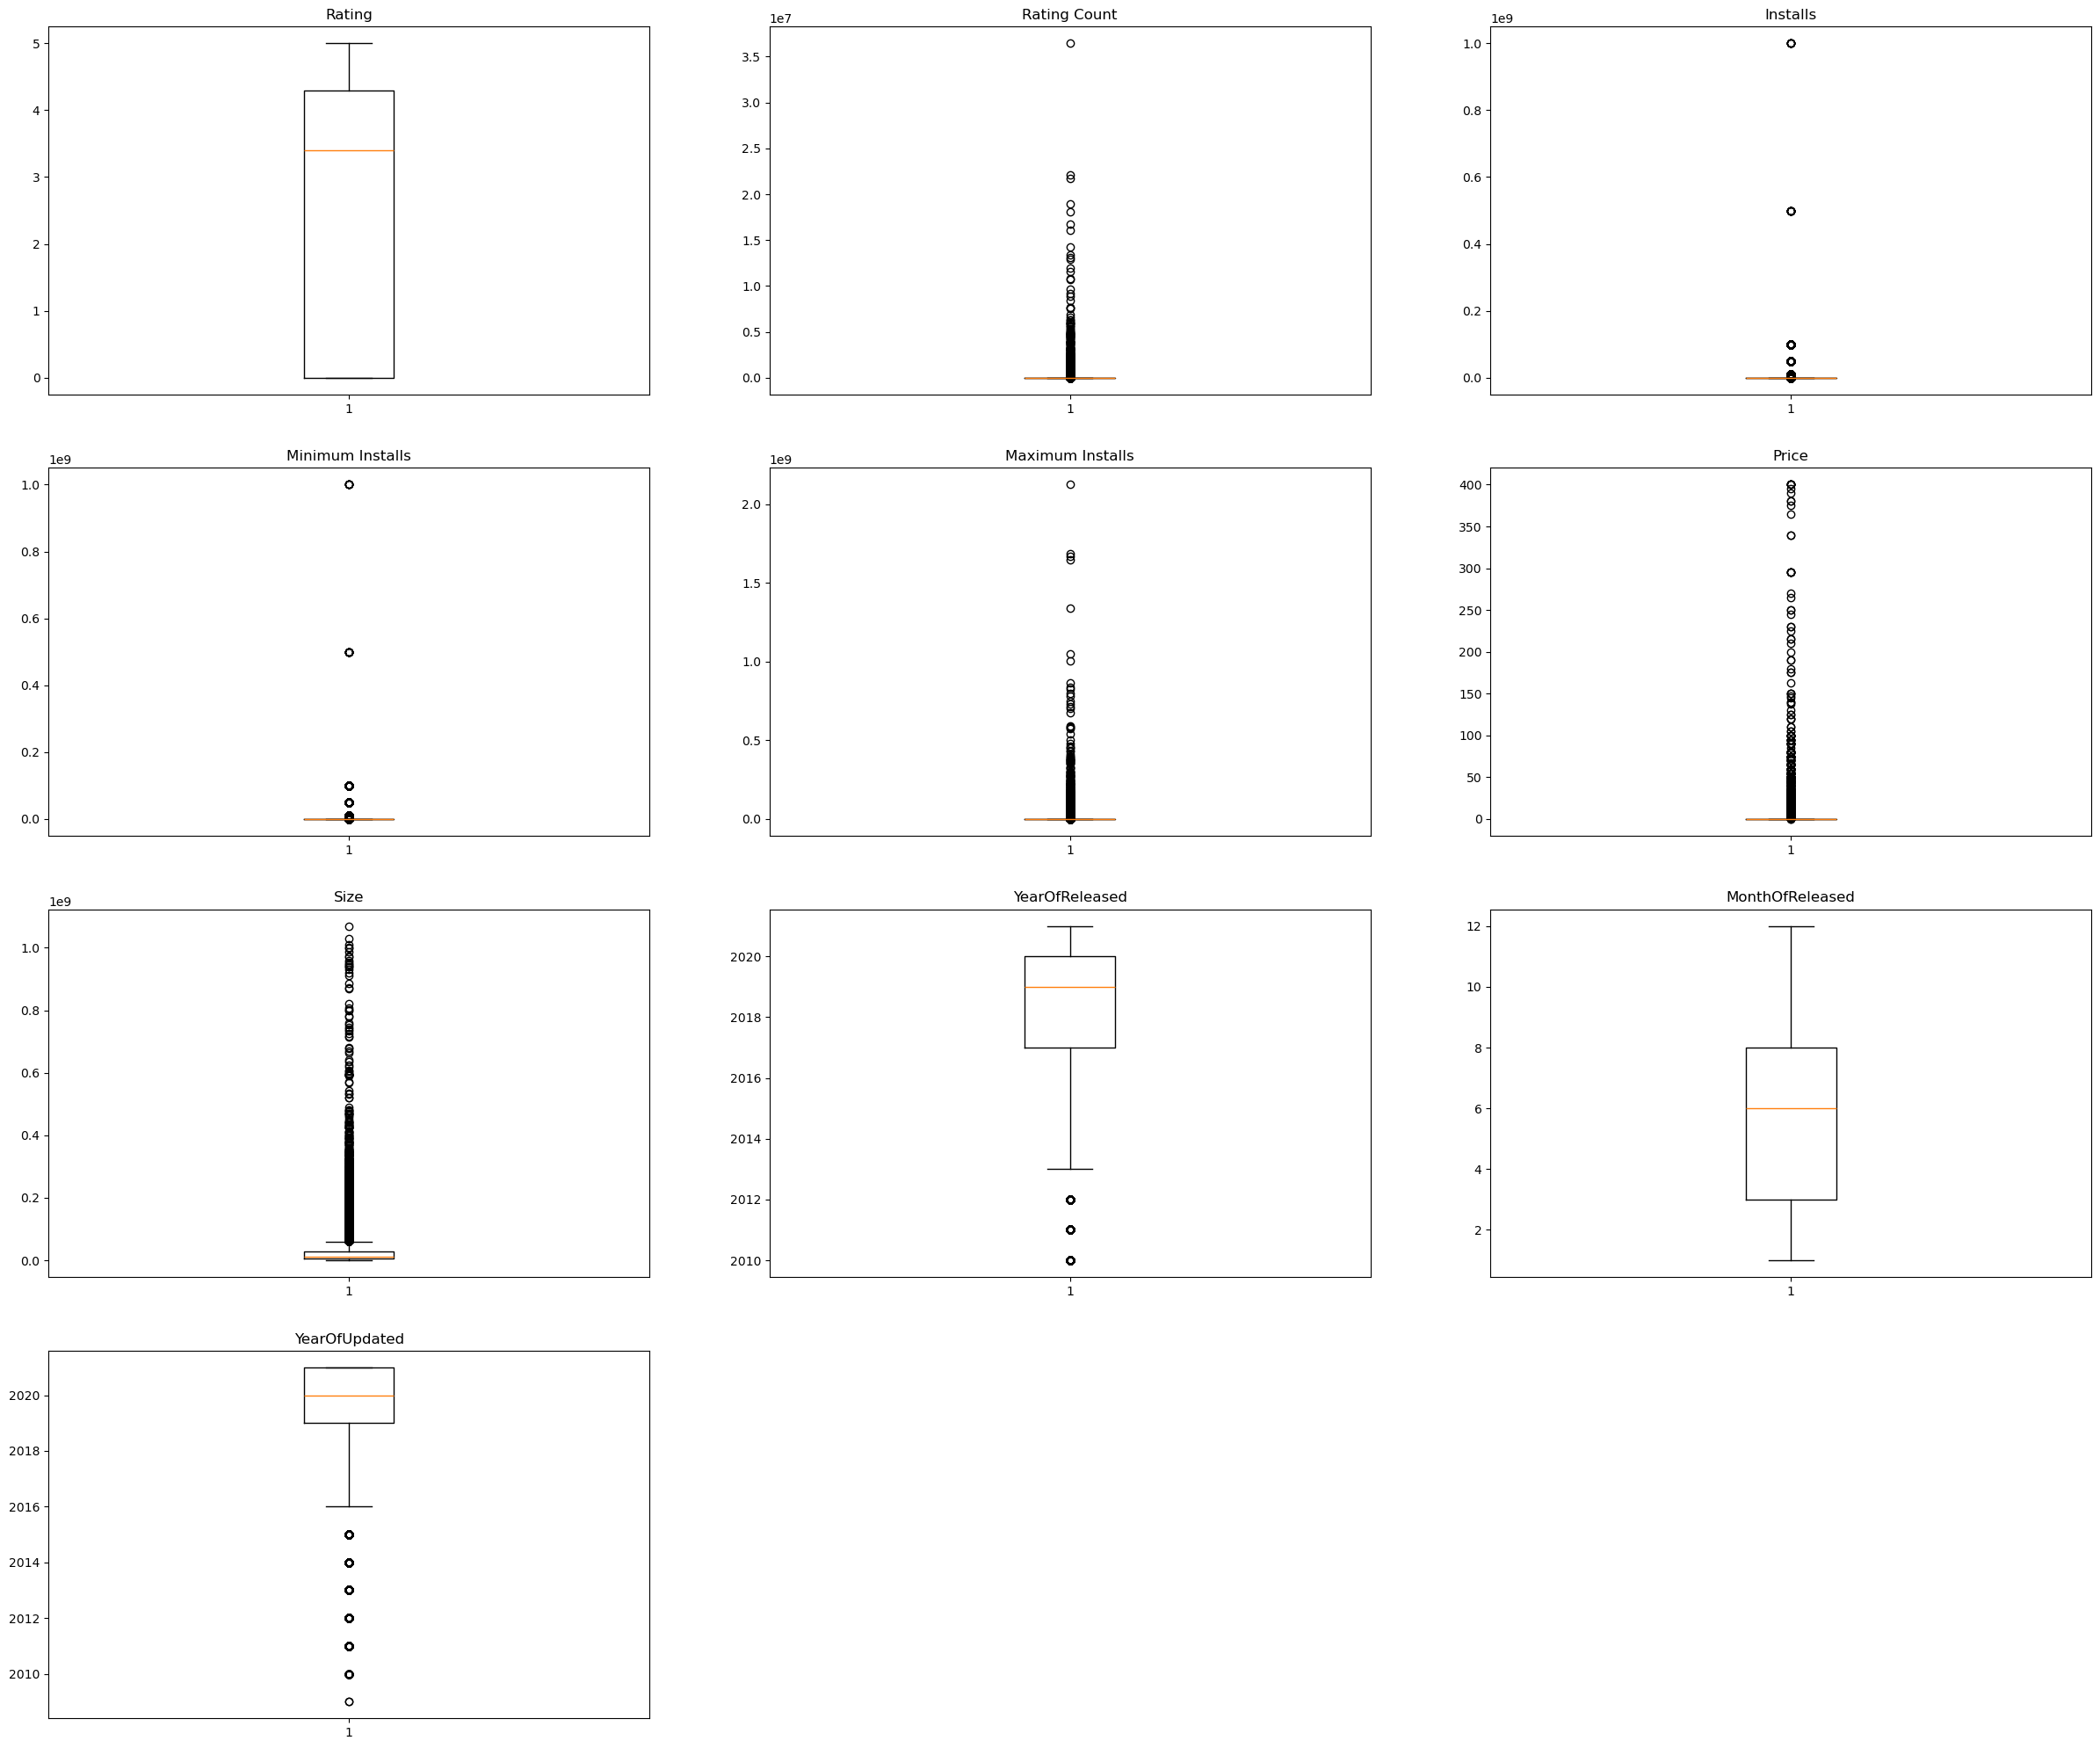

In [30]:
col3=app.select_dtypes('number').columns
print(len(col3))
plt.figure(figsize=(30,25))
for i , col in enumerate(col3):
    plt.subplot(4,3,i+1)
    plt.title(col)
    plt.boxplot(app[col])

In [31]:
print(app['Editors Choice'].value_counts())
print(app['Price'].value_counts())

Editors Choice
False    869178
True        336
Name: count, dtype: int64
Price
0.000000     852403
0.990000       4518
1.990000       2362
1.490000       1442
2.990000       1415
              ...  
8.030000          1
2.575421          1
6.450000          1
2.148679          1
26.746362         1
Name: count, Length: 521, dtype: int64


In [32]:
def count_outliers_iqr(app, column):
    # حساب الربيعيات
    Q1 = app[column].quantile(0.25)
    Q3 = app[column].quantile(0.75)
    
    # حساب المدى بين الربيعين (IQR)
    IQR = Q3 - Q1
    
    # تحديد الحدود العليا والدنيا
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # حساب عدد القيم الشاذة
    outliers = app[(app[column] < lower_bound) | (app[column] > upper_bound)]
    
    return len(outliers), lower_bound, upper_bound

# إزالة القيم الشاذة من DataFrame
def remove_outliers_iqr(app):
    # تحديد الأعمدة الرقمية فقط
    numeric_cols = app.select_dtypes(include='number').columns.drop(['Price'])
    
    for col in numeric_cols:
        outliers_count, lower_bound, upper_bound = count_outliers_iqr(app, col)
        print(f'{col} : Number of outliers: {outliers_count}')
        
        # إزالة الصفوف التي تحتوي على قيم شاذة مع الحفاظ على الصفوف التي تحتوي على True في عمود 'Editors Choice'
        app = app[((app[col] >= lower_bound) & (app[col] <= upper_bound)) | (app['Editors Choice'] == True)]
    
    return app

# مثال على استخدام الدالة
# df = pd.read_csv('your_data.csv')
app = remove_outliers_iqr(app)

# عرض DataFrame بعد إزالة القيم الشاذة
print(app)


Rating : Number of outliers: 0
Rating Count : Number of outliers: 147520
Installs : Number of outliers: 130791
Minimum Installs : Number of outliers: 336
Maximum Installs : Number of outliers: 59302
Size : Number of outliers: 38358
YearOfReleased : Number of outliers: 3547
MonthOfReleased : Number of outliers: 0
YearOfUpdated : Number of outliers: 49488
                                             App Name           Category  \
4                                             GROW.me              Tools   
6                    unlimited 4G data prank free app   Libraries & Demo   
11                                            Parents  Maps & Navigation   
13                                       be.MOBILISED  Maps & Navigation   
16                               OTENTIK Discovery FR     Travel & Local   
...                                               ...                ...   
2312919                             Good Night Quotes    Personalization   
2312921      Georgia DMV Driver Lice

In [33]:
def count_outliers_iqr(app, column):
    # حساب الربيعيات
    Q1 = app[column].quantile(0.25)
    Q3 = app[column].quantile(0.75)
    
    # حساب المدى بين الربيعين (IQR)
    IQR = Q3 - Q1
    
    # تحديد الحدود العليا والدنيا
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # حساب عدد القيم الشاذة
    outliers = app[(app[column] < lower_bound) | (app[column] > upper_bound)]
    
    return len(outliers)

# مثال على استخدام الدالة
# افترض أن لديك DataFrame اسمه df وعمود اسمه 'column_name'
# df = pd.read_csv('your_data.csv')
for i in col3:
 outliers_count = count_outliers_iqr(app, i)
 print(f' {i} : Number of outliers: {outliers_count}')


 Rating : Number of outliers: 0
 Rating Count : Number of outliers: 43257
 Installs : Number of outliers: 336
 Minimum Installs : Number of outliers: 336
 Maximum Installs : Number of outliers: 36708
 Price : Number of outliers: 7315
 Size : Number of outliers: 13963
 YearOfReleased : Number of outliers: 8648
 MonthOfReleased : Number of outliers: 0
 YearOfUpdated : Number of outliers: 0


In [34]:
app.nunique()
app.dtypes
df=pd.DataFrame({"numOfValues":app.nunique(),"type":app.dtypes})
df

,numOfValues,type
App Name,432076,object
Category,48,object
Rating,42,float64
Rating Count,467,float64
Installs,18,int64
Minimum Installs,18,float64
Maximum Installs,2919,int64
Price,246,float64
Currency,5,object
Size,1203,float64


In [35]:
# original_apps=app
original_indices = app.index
app_name=app['App Name']


In [36]:
x=app.drop(['Rating','App Name'],axis=1)
y=app['Rating']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=150)
print(f"X_train_sampled: {x_train.shape}")
print(f"y_train_sampled: {y_train.shape}")
print(f"X_test_sampled: {x_test.shape}")
print(f"y_test_sampled: {y_test.shape}")


X_train_sampled: (353422, 16)
y_train_sampled: (353422,)
X_test_sampled: (88356, 16)
y_test_sampled: (88356,)


In [38]:
#ENCODING THE OBJECT COLUMNS
categorical_columns = app.select_dtypes('object').columns.drop(['App Name'])
for col2  in categorical_columns:
    codes , uni=pd.factorize(x_train[col2]) 
    x_train[col2] = codes
    x_test[col2] = x_test[col2].apply(lambda x: np.where(uni == x)[0][0] if x in uni else -1)

x_train.head()

,Category,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice,YearOfReleased,MonthOfReleased,YearOfUpdated
1639559,0,28.0,1000,1000.0,2067,0.0,0,11534336.0,0,0,False,False,False,2020,7,2021
1435697,0,18.0,100,100.0,300,0.0,0,11534336.0,0,0,False,False,False,2020,2,2020
1571522,1,8.0,1000,1000.0,1312,0.0,0,2411724.8,1,0,False,False,False,2019,8,2021
1650209,2,0.0,500,500.0,658,0.0,0,7759462.4,1,0,True,False,False,2019,12,2021
2286261,3,0.0,50,50.0,87,0.0,0,28311552.0,1,0,True,False,False,2018,12,2019


In [39]:

scalar=RobustScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
print(x_test)
print(x_train)



[[ 0.57142857  0.          0.81632653 ... -2.5         1.4
   0.5       ]
 [-0.21428571  0.          0.         ...  0.         -0.6
   0.5       ]
 [ 0.35714286  0.          0.81632653 ...  0.5        -0.6
   0.        ]
 ...
 [ 0.07142857  1.33333333  0.         ... -2.         -0.2
  -0.5       ]
 [ 0.78571429  0.         -0.18367347 ...  1.         -0.2
   0.5       ]
 [-0.21428571  0.          1.83673469 ... -0.5         0.8
  -0.5       ]]
[[-0.78571429  4.66666667  1.83673469 ...  0.5         0.4
   0.5       ]
 [-0.78571429  3.          0.         ...  0.5        -0.6
   0.        ]
 [-0.71428571  1.33333333  1.83673469 ...  0.          0.6
   0.5       ]
 ...
 [-0.35714286  0.83333333  0.81632653 ...  0.5        -0.2
   0.        ]
 [-0.64285714  0.          0.         ...  0.          0.4
   0.5       ]
 [ 0.07142857  0.          0.         ... -0.5         1.4
   0.5       ]]


In [40]:
names=app.columns
correlations = [np.corrcoef(x_train[:, i], y_train)[0, 1] for i in range(x_train.shape[1])]
# عرض النتائج
for i, corr in enumerate(correlations):
    print(f'Correlation between Rating and column {names[i]}: {corr}')

Correlation between Rating and column App Name: -0.010859740482456947
Correlation between Rating and column Category: 0.014586846442841011
Correlation between Rating and column Rating: 0.014711810342626317
Correlation between Rating and column Rating Count: 0.014711810342626317
Correlation between Rating and column Installs: 0.016273606380812877
Correlation between Rating and column Minimum Installs: 0.004829397225997653
Correlation between Rating and column Maximum Installs: -0.0016066669701257582
Correlation between Rating and column Price: 0.036217469410980224
Correlation between Rating and column Currency: 0.0032582410032188204
Correlation between Rating and column Size: -0.0076615933612687636
Correlation between Rating and column Minimum Android: 0.02774571261475243
Correlation between Rating and column Content Rating: 0.05788871315811568
Correlation between Rating and column Ad Supported: 0.04074701322965816
Correlation between Rating and column In App Purchases: -0.0973716257326

In [73]:
print(len(correlations))
print(app.columns)
names=app.drop(['Rating','App Name'],axis=1)
names=pd.DataFrame(names)
print(len(names.columns))


16
Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'YearOfReleased', 'MonthOfReleased', 'YearOfUpdated'],
      dtype='object')
16


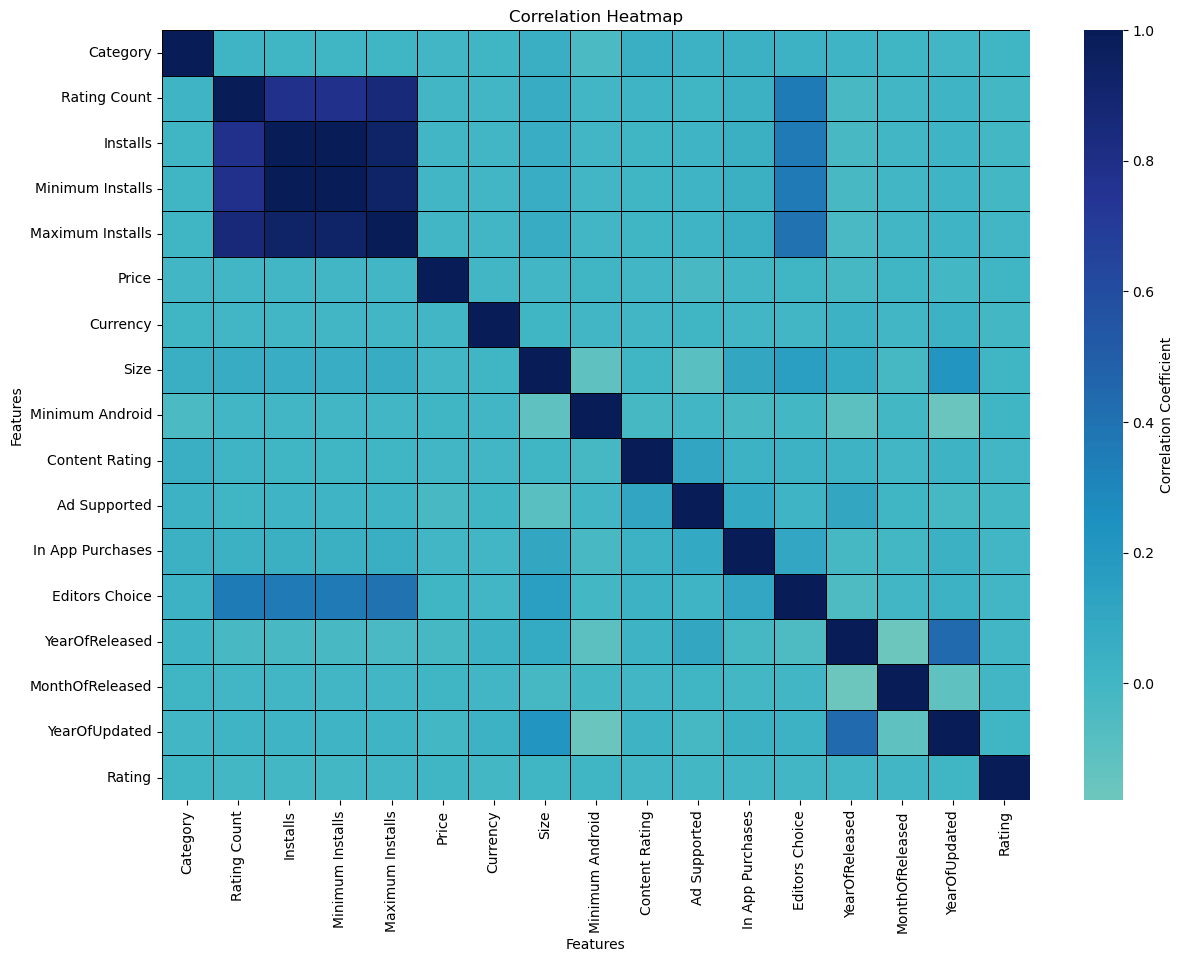

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert x_train to a DataFrame using column names
x_train_df = pd.DataFrame(x_train, columns=names.columns)  # Convert DataFrame columns to a list

# Assuming y_train is a 1D array and needs to be added as a new column
y_train_df = pd.Series(y_train, name='Rating')  # Name this according to your target variable

# Combine x_train and y_train into one DataFrame
combined_df = pd.concat([x_train_df, y_train_df], axis=1)


# Calculate the correlation matrix
corr_matrix = combined_df.corr()

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))  # Increase the figure size
sns.heatmap(corr_matrix,fmt=".2f", cmap='YlGnBu', center=0, cbar_kws={'label': 'Correlation Coefficient'}, 
            linewidths=.5, linecolor='black')  # Change colormap and add borders
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


In [41]:
params_lr = {
    'fit_intercept': [True, False]
}

params_rf = {
    'n_estimators': [50,400, 700],
    'max_depth': [None, 20, 35]
}

params_xgb = {
    'n_estimators': [50, 400, 800],
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 20, 35],
    'subsample': [0.6,1.0]
}

# إعداد النماذج
model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()



In [42]:
# Perform GridSearchCV for Linear Regression
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=params_lr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lr.fit(x_train, y_train)

# Print best model, parameters, and R-squared score for Linear Regression
print(f"Best model for Linear Regression: {grid_search_lr.best_estimator_}")
print(f"Best parameters for Linear Regression: {grid_search_lr.best_params_}")
print(f"Best R-squared for Linear Regression (CV): {grid_search_lr.best_score_}")

# Predictions and evaluation on x_test
y_pred_lr_test = grid_search_lr.predict(x_test)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
print(f"Mean Squared Error for Linear Regression (Test): {mse_lr_test}")
print(f"R-squared for Linear Regression (Test): {r2_lr_test}")

# Predictions and evaluation on x_train
y_pred_lr_train = grid_search_lr.predict(x_train)
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
print(f"Mean Squared Error for Linear Regression (Train): {mse_lr_train}")
print(f"R-squared for Linear Regression (Train): {r2_lr_train}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best model for Linear Regression: LinearRegression()
Best parameters for Linear Regression: {'fit_intercept': True}
Best R-squared for Linear Regression (CV): 0.022259064333970957
Mean Squared Error for Linear Regression (Test): 4.1781466899089965
R-squared for Linear Regression (Test): 0.024035994954311635
Mean Squared Error for Linear Regression (Train): 4.1527279565506925
R-squared for Linear Regression (Train): 0.022342671413228987


In [43]:
# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=params_rf, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Print best model, parameters, and R-squared score for Random Forest
print(f"Best model for Random Forest: {grid_search_rf.best_estimator_}")
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best R-squared for Random Forest (CV): {grid_search_rf.best_score_}")

# Predictions and evaluation on x_test
y_pred_rf_test = grid_search_rf.predict(x_test)
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print(f"Mean Squared Error for Random Forest (Test): {mse_rf_test}")
print(f"R-squared for Random Forest (Test): {r2_rf_test}")

# Predictions and evaluation on x_train
y_pred_rf_train = grid_search_rf.predict(x_train)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
print(f"Mean Squared Error for Random Forest (Train): {mse_rf_train}")
print(f"R-squared for Random Forest (Train): {r2_rf_train}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best model for Random Forest: RandomForestRegressor(max_depth=20, n_estimators=700)
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 700}
Best R-squared for Random Forest (CV): 0.9693432426611232
Mean Squared Error for Random Forest (Test): 0.13232240807303475
R-squared for Random Forest (Test): 0.9690911026048581
Mean Squared Error for Random Forest (Train): 0.052147293673237956
R-squared for Random Forest (Train): 0.9877232064418797


In [44]:
# Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=params_xgb, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit GridSearchCV for the model
grid_search_xgb.fit(x_train, y_train)

# Display results for the model
print(f"Best model for XGBoost: {grid_search_xgb.best_estimator_}")
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best R-squared for XGBoost (CV): {grid_search_xgb.best_score_}")

# Predictions and evaluation on x_test
y_pred_xgb_test = grid_search_xgb.predict(x_test)
mse_xgb_test = mean_squared_error(y_test, y_pred_xgb_test)
r2_xgb_test = r2_score(y_test, y_pred_xgb_test)
print(f"Mean Squared Error for XGBoost (Test): {mse_xgb_test}")
print(f"R-squared for XGBoost (Test): {r2_xgb_test}")

# Predictions and evaluation on x_train
y_pred_xgb_train = grid_search_xgb.predict(x_train)
mse_xgb_train = mean_squared_error(y_train, y_pred_xgb_train)
r2_xgb_train = r2_score(y_train, y_pred_xgb_train)
print(f"Mean Squared Error for XGBoost (Train): {mse_xgb_train}")
print(f"R-squared for XGBoost (Train): {r2_xgb_train}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best model for XGBoost: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 800, 'subsample': 0.6}
Best R-squared for XGBoost (CV): 0.9703449464052826
Mean Squa

In [45]:
KerasModel = keras.models.Sequential([
                # keras.layers.Input(shape=(17)),
            keras.layers.Dense(8,  activation = 'sigmoid'),
            # keras.layers.Dropout(0.1),
            keras.layers.Dense(128, activation = 'sigmoid'),
            # keras.layers.Dropout(0.3),
            # keras.layers.Dense(64, activation = 'sigmoid'),
            keras.layers.Dense(32, activation = 'sigmoid'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'relu')
            ])

In [46]:
from tensorflow.keras.optimizers import AdamW

MyOptimizer = AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    # jit_compile=True,
    name="AdamW")

In [47]:
from tensorflow.keras import backend as K

def r2_metric(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))  # Residual sum of squares
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))  # Total sum of squares
    return 1 - ss_res / (ss_tot + K.epsilon())

In [48]:
KerasModel.compile(optimizer ='adam',loss='mean_squared_error',metrics=[r2_metric],jit_compile=False)

In [49]:
history = KerasModel.fit(x_train,y_train,
                         validation_data=(x_test,y_test),
                         epochs=300,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_loss',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.5709 - r2_metric: -0.3154 - val_loss: 4.3027 - val_r2_metric: -0.0052
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3808 - r2_metric: -0.0306 - val_loss: 4.1866 - val_r2_metric: 0.0220
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2459 - r2_metric: 7.4341e-04 - val_loss: 4.0431 - val_r2_metric: 0.0555
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0452 - r2_metric: 0.0467 - val_loss: 3.7233 - val_r2_metric: 0.1302
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6499 - r2_metric: 0.1393 - val_loss: 3.0500 - val_r2_metric: 0.2875
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9337 - r2_metric: 0.3080 - val_loss: 2.2117 - val_r2_metric: 0.4834
Epoch 7/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1948 - r2_metric: 0.4830 - val_loss: 1.6300 - val_r2_metric: 0.6193
Epoch 8/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6529 - r2_metric: 0.6125 - v

In [50]:
y_pred = KerasModel.predict(x_test)

2762/2762 ━━━━━━━━━━━━━━━━━━━━ 2s 662us/step


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# حساب المقاييس لمجموعة الاختبار
mae_test = mean_absolute_error(y_test, y_pred)
mse_deep1_test = mean_squared_error(y_test, y_pred)
median_ae_test = median_absolute_error(y_test, y_pred)
r2_deep1_test = r2_score(y_test, y_pred)

# تخزين مقاييس مجموعة الاختبار في متغير
metrics_test = {
    'Mean Absolute Error': mae_test,
    'Mean Squared Error': mse_deep1_test,
    'Median Absolute Error': median_ae_test,
    'R-squared': r2_deep1_test
}

# حساب المقاييس لمجموعة التدريب
y_pred_train = KerasModel.predict(x_train)  # توقع القيم لمجموعة التدريب
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_deep1_train = mean_squared_error(y_train, y_pred_train)
median_ae_train = median_absolute_error(y_train, y_pred_train)
r2_deep1_train = r2_score(y_train, y_pred_train)

# تخزين مقاييس مجموعة التدريب في متغير
metrics_train = {
    'Mean Absolute Error': mae_train,
    'Mean Squared Error': mse_deep1_train,
    'Median Absolute Error': median_ae_train,
    'R-squared': r2_deep1_train
}

# عرض النتائج
print('Test Set Metrics:', metrics_test)
print('Train Set Metrics:', metrics_train)


11045/11045 ━━━━━━━━━━━━━━━━━━━━ 7s 632us/step
Test Set Metrics: {'Mean Absolute Error': 0.1517296639907689, 'Mean Squared Error': 0.13491730852189937, 'Median Absolute Error': 0.0, 'R-squared': 0.9684849655726459}
Train Set Metrics: {'Mean Absolute Error': 0.1488124993025928, 'Mean Squared Error': 0.13232528718320055, 'Median Absolute Error': 0.0, 'R-squared': 0.9688472762662111}


In [52]:
KerasModel2 = keras.models.Sequential([
                # keras.layers.Input(shape=(17)),
            keras.layers.Dense(8,  activation = 'tanh'),
            # keras.layers.Dropout(0.1),
            keras.layers.Dense(128, activation = 'tanh'),
            # keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation = 'tanh'),
            keras.layers.Dense(32, activation = 'tanh'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'relu')
            ])

In [53]:
KerasModel2.compile(optimizer ='adam',loss='mean_squared_error',metrics=[r2_metric],jit_compile=False)

In [54]:
history = KerasModel2.fit(x_train,y_train,
                         validation_data=(x_test,y_test),
                         epochs=300,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_loss',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.5982 - r2_metric: 0.1538 - val_loss: 1.0288 - val_r2_metric: 0.7597
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8846 - r2_metric: 0.7921 - val_loss: 0.5242 - val_r2_metric: 0.8776
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5304 - r2_metric: 0.8751 - val_loss: 0.3105 - val_r2_metric: 0.9275
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3543 - r2_metric: 0.9166 - val_loss: 0.2177 - val_r2_metric: 0.9492
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2879 - r2_metric: 0.9323 - val_loss: 0.1843 - val_r2_metric: 0.9570
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2566 - r2_metric: 0.9396 - val_loss: 0.1701 - val_r2_metric: 0.9603
Epoch 7/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2416 - r2_metric: 0.9431 - val_loss: 0.1623 - val_r2_metric: 0.9621
Epoch 8/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2324 - r2_metric: 0.9453 - va

In [55]:
y_pred = KerasModel.predict(x_test)

2762/2762 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# حساب المقاييس لمجموعة الاختبار
mae_test = mean_absolute_error(y_test, y_pred)
mse_deep2_test = mean_squared_error(y_test, y_pred)
median_ae_test = median_absolute_error(y_test, y_pred)
r2_deep2_test = r2_score(y_test, y_pred)

# تخزين مقاييس مجموعة الاختبار في متغير
metrics_test = {
    'Mean Absolute Error': mae_test,
    'Mean Squared Error': mse_deep2_test,
    'Median Absolute Error': median_ae_test,
    'R-squared': r2_deep2_test
}

# حساب المقاييس لمجموعة التدريب
y_pred_train = KerasModel2.predict(x_train)  # توقع القيم لمجموعة التدريب
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_deep2_train = mean_squared_error(y_train, y_pred_train)
median_ae_train = median_absolute_error(y_train, y_pred_train)
r2_deep2_train = r2_score(y_train, y_pred_train)

# تخزين مقاييس مجموعة التدريب في متغير
metrics_train = {
    'Mean Absolute Error': mae_train,
    'Mean Squared Error': mse_deep2_train,
    'Median Absolute Error': median_ae_train,
    'R-squared': r2_deep2_train
}

# عرض النتائج
print('Test Set Metrics:', metrics_test)
print('Train Set Metrics:', metrics_train)


11045/11045 ━━━━━━━━━━━━━━━━━━━━ 7s 633us/step
Test Set Metrics: {'Mean Absolute Error': 0.1517296639907689, 'Mean Squared Error': 0.13491730852189937, 'Median Absolute Error': 0.0, 'R-squared': 0.9684849655726459}
Train Set Metrics: {'Mean Absolute Error': 0.14729658351443942, 'Mean Squared Error': 0.13099022547800798, 'Median Absolute Error': 0.0, 'R-squared': 0.9691615836019802}


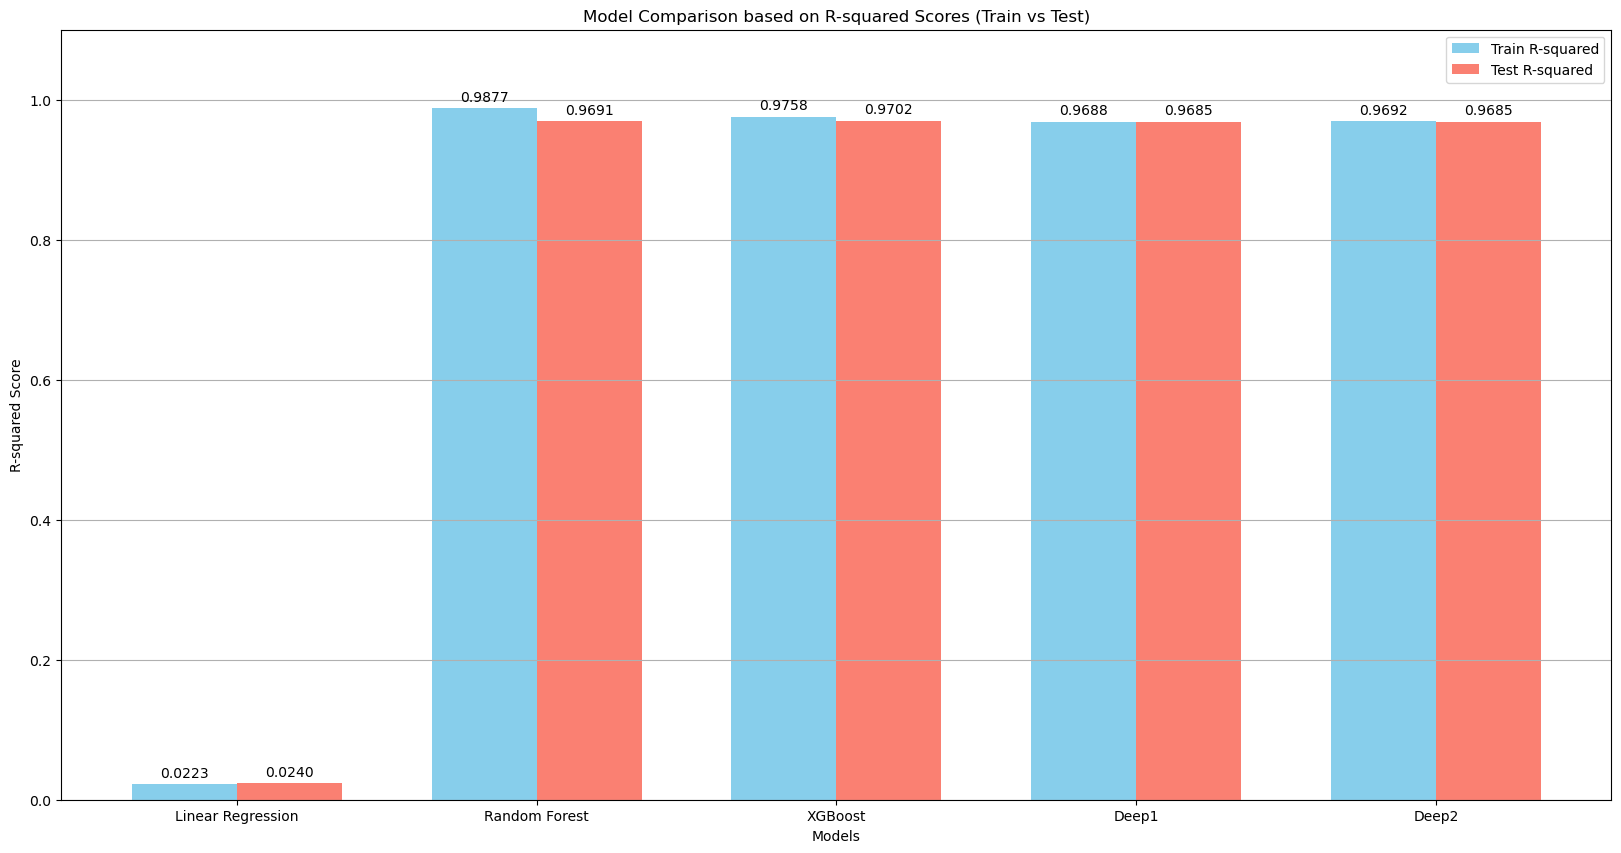

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Assumptions: You have the output values for each model
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Deep1', 'Deep2']

# Replace these values with actual results from your models
r2_train = [
    r2_lr_train,  # R-squared value for Linear Regression on the training set
    r2_rf_train,  # R-squared value for Random Forest on the training set
    r2_xgb_train, # R-squared value for XGBoost on the training set
    r2_deep1_train, # R-squared value for Deep1 on the training set
    r2_deep2_train  # R-squared value for Deep2 on the training set
]

r2_test = [
    r2_lr_test,  # R-squared value for Linear Regression on the test set
    r2_rf_test,  # R-squared value for Random Forest on the test set
    r2_xgb_test, # R-squared value for XGBoost on the test set
    r2_deep1_test, # R-squared value for Deep1 on the test set
    r2_deep2_test  # R-squared value for Deep2 on the test set
]

# Set up the figure and plot properties
x = np.arange(len(models))  # Bar positions
width = 0.35  # Width of the bars

# Set up the figure
plt.figure(figsize=(20, 10))

# Plot the values for both the training and test sets
bars1 = plt.bar(x - width/2, r2_train, width, label='Train R-squared', color='skyblue')
bars2 = plt.bar(x + width/2, r2_test, width, label='Test R-squared', color='salmon')

# Add titles and labels
plt.title('Model Comparison based on R-squared Scores (Train vs Test)')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1
plt.xticks(x, models)  # Set model names on the x-axis

# Add values on top of the bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, 
             f'{bar.get_height():.4f}', ha='center')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, 
             f'{bar.get_height():.4f}', ha='center')

# Add the legend
plt.legend()

# Display the plot
plt.grid(axis='y')
plt.show()


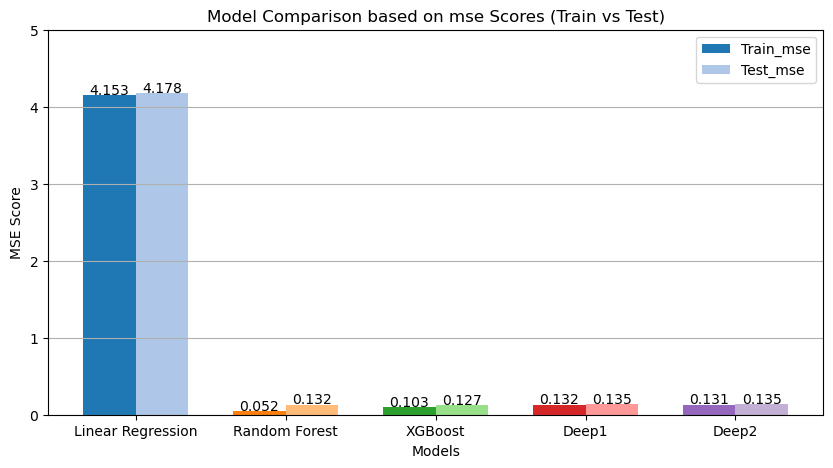

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Assumptions: You have the output values for each model
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Deep1', 'Deep2']

# Replace these values with actual results from your models
mse_train = [
    mse_lr_train,  # R-squared value for Linear Regression on the training set
    mse_rf_train,  # R-squared value for Random Forest on the training set
    mse_xgb_train, # R-squared value for XGBoost on the training set
    mse_deep1_train, # R-squared value for SVM on the training set
    mse_deep2_train  # R-squared value for KNN on the training set
]

mse_test = [
    mse_lr_test,  # R-squared value for Linear Regression on the test set
    mse_rf_test,  # R-squared value for Random Forest on the test set
    mse_xgb_test, # R-squared value for XGBoost on the test set
    mse_deep1_test, # R-squared value for SVM on the test set
    mse_deep2_test  # R-squared value for KNN on the test set
]

# Set the figure and bar properties
x = np.arange(len(models))  # Positions of the bars
width = 0.35  # Width of the bars

# Different colors for each model
colors_train = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Colors for the training set
colors_test = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']  # Colors for the test set

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the values for both the training and test sets with different colors
bars1 = plt.bar(x - width/2, mse_train, width, label='Train_mse', color=colors_train)
bars2 = plt.bar(x + width/2, mse_test, width, label='Test_mse', color=colors_test)

# Add titles and labels
plt.title('Model Comparison based on mse Scores (Train vs Test)')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.ylim(0, 5)  # Y-axis limits from 0 to 1
plt.xticks(x, models)  # Set model names on the x-axis

# Add the values above the bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, 
             f'{bar.get_height():.3f}', ha='center')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, 
             f'{bar.get_height():.3f}', ha='center')

# Add the legend
plt.legend()

# Display the plot
plt.grid(axis='y')
plt.show()


In [59]:
x1=pd.DataFrame(x_train)
x2=pd.DataFrame(x_test)
print(app.columns)

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'YearOfReleased', 'MonthOfReleased', 'YearOfUpdated'],
      dtype='object')


In [60]:
X_combined = pd.concat([x1, x2], ignore_index=False)
X_combined = X_combined[~X_combined.index.duplicated(keep='first')]
X_combined = X_combined.reindex(original_indices)
X_combined.columns = [
    'Category', 'Rating Count', 'Installs', 'Minimum Installs',
    'Maximum Installs', 'Price', 'Currency', 'Size', 'Minimum Android',
    'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice',
    'YearOfReleased', 'MonthOfReleased', 'YearOfUpdated'
]
print(X_combined.index.equals(original_indices))

True


In [61]:
print(X_combined.shape)
print(original_indices.shape)

(441778, 16)
(441778,)


In [62]:
X_combined.head(10)

,Category,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice,YearOfReleased,MonthOfReleased,YearOfUpdated
4,-0.571429,0.000000,-0.102041,-0.102041,-0.157978,0.0,0.0,1.08125,-0.333333,0.0,1.0,0.0,0.0,-0.5,1.4,-0.5
6,-0.785714,0.833333,1.836735,1.836735,2.635071,0.0,0.0,-0.47500,0.000000,0.0,0.0,0.0,0.0,-0.5,-0.2,-0.5
11,-0.214286,0.000000,0.000000,0.000000,-0.028436,0.0,0.0,-0.33125,0.666667,1.0,1.0,0.0,0.0,0.0,-0.6,-0.5
13,-0.142857,0.000000,0.000000,0.000000,0.235387,0.0,0.0,0.26875,-0.666667,0.0,0.0,1.0,0.0,-2.5,-0.4,0.5
16,-0.642857,1.333333,0.000000,0.000000,0.069510,0.0,0.0,1.76875,1.000000,0.0,0.0,0.0,0.0,1.0,-0.2,0.5
17,-0.357143,0.000000,-0.183673,-0.183673,-0.235387,0.0,0.0,0.51875,1.333333,0.0,0.0,0.0,0.0,0.5,0.6,0.0
19,0.071429,3.000000,1.836735,1.836735,2.484992,0.0,0.0,2.58125,1.666667,0.0,0.0,0.0,0.0,-0.5,0.2,0.0
30,-0.500000,0.000000,-0.183673,-0.183673,-0.251185,0.0,0.0,-0.26250,0.666667,3.0,1.0,0.0,0.0,-0.5,-0.4,-1.0
33,-0.357143,0.000000,-0.102041,-0.102041,-0.153239,0.0,0.0,0.70625,2.333333,0.0,1.0,0.0,0.0,0.5,0.6,0.0
38,0.428571,0.000000,-0.183673,-0.183673,-0.262243,0.0,0.0,0.33125,-0.333333,1.0,1.0,0.0,0.0,0.5,0.4,0.0


In [63]:
app.head(10)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice,YearOfReleased,MonthOfReleased,YearOfUpdated
4,GROW.me,Tools,0.0,0.0,100,100.0,478,0.0,USD,6501171.2,4.1 and up,Everyone,False,False,False,2020,2,2018
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,1000,1000.0,2567,0.0,USD,2621440.0,4.1 and up,Everyone,True,False,False,2019,9,2019
11,Parents,Maps & Navigation,0.0,0.0,100,100.0,330,0.0,USD,2831155.2,4.0 and up,Everyone,False,False,False,2018,1,2018
13,be.MOBILISED,Maps & Navigation,0.0,0.0,100,100.0,274,0.0,USD,15728640.0,6.0 and up,Everyone,False,False,False,2020,2,2021
16,OTENTIK Discovery FR,Travel & Local,3.4,5.0,500,500.0,949,0.0,USD,3040870.4,4.4 and up,Everyone,False,False,False,2016,11,2019
17,All in one shopping app,Tools,5.0,6.0,50,50.0,62,0.0,USD,2097152.0,4.1 and up,Everyone,False,False,False,2019,4,2019
19,Contemporary Love Wallpaper HD,Books & Reference,0.0,0.0,1,1.0,2,0.0,XXX,11534336.0,4.2 and up,Mature 17+,True,False,False,2020,12,2021
30,Barnets Hair,Lifestyle,0.0,0.0,100,100.0,345,0.0,USD,37748736.0,5.0 and up,Everyone,False,False,False,2018,2,2020
33,Creepy Story,Entertainment,0.0,0.0,10,10.0,22,0.0,USD,6396313.6,4.1 and up,Teen,True,False,False,2019,5,2019
38,Business Class Fitness,Health & Fitness,0.0,0.0,1,1.0,2,0.0,USD,10485760.0,7.0 and up,Everyone,False,False,False,2020,4,2020


In [64]:
print(X_combined.index.duplicated().sum())  # عدد الفهارس المكررة في X_combined
print(pd.Index(original_indices).duplicated().sum())  # عدد الفهارس المكررة في original_indices


0
0


In [65]:
print(X_combined.index.equals(original_indices))


True


In [66]:
predicted_ratings = grid_search_xgb.best_estimator_.predict(X_combined )

In [67]:
print(X_combined.columns)


Index(['Category', 'Rating Count', 'Installs', 'Minimum Installs',
       'Maximum Installs', 'Price', 'Currency', 'Size', 'Minimum Android',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'YearOfReleased', 'MonthOfReleased', 'YearOfUpdated'],
      dtype='object')


In [68]:
X_combined['app'] = app_name  # قائمة أسماء التطبيقات
X_combined['predicted_rating'] = predicted_ratings 

# Combine features into a single feature set
features = X_combined[['predicted_rating', 'Price', 'Category']].values

In [69]:
import pandas as pd

# افترض أنك قد قمت بتحميل البيانات الأصلية (original_apps)
# original_apps = pd.read_csv('path_to_original_apps.csv')

# ترميز الفئات باستخدام factorize
encoded_categories, original_categories = pd.factorize(app['Category'])

# Function to calculate overall similarity
def overall_similarity(app1, app2, category_weight=0.5):
    """
    حساب التشابه بين تطبيقين بناءً على عدة معايير.
    """
    # حساب تشابه الفئة (إذا كانت الفئة هي نفسها يتم إعطاء نقاط أعلى)
    category_similarity = 1 if app1['Category'] == app2['Category'] else 0

    # حساب تشابه في الخصائص الأخرى (التقييمات والأسعار)
    rating_similarity = 1 - abs(app1['Rating Count'] - app2['Rating Count']) / max(app1['Rating Count'], app2['Rating Count'], 1)
    price_similarity = 1 - abs(app1['Price'] - app2['Price']) / max(app1['Price'], app2['Price'], 1)

    # التأكد من أن مجموع الأوزان هو 1 لضمان أن النتيجة النهائية تكون بين 0 و 1
    overall_similarity_score = (category_similarity * category_weight) + \
                               (rating_similarity * (1 - category_weight) * 0.5) + \
                               (price_similarity * (1 - category_weight) * 0.5)

    return overall_similarity_score

# Function to calculate and save top 10 most similar apps to CSV
def calculate_similarity_and_save_to_csv(app_name, output_csv='similar_apps_results.csv'):
    if app_name not in X_combined['app'].values:
        print(f"{app_name} not found in the dataset.")
        return

    # Get the features for the selected app
    app_idx = X_combined[X_combined['app'] == app_name].index[0]
    app1 = X_combined.loc[app_idx]

    similarities = []

    # Compute similarity between the selected app and all other apps
    for idx, app2 in X_combined.iterrows():
        if idx != app_idx:
            sim = overall_similarity(app1, app2, category_weight=0.5)
            similarities.append((app2['app'], sim))

    # Sort by similarity (higher score = more similar)
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

    # Create a list to hold the results for CSV
    csv_results = []

    # Print and save top 10 most similar apps with category names
    print(f"Top 10 most similar apps to {app_name}:")
    for app_name, sim in similarities[:10]:
        # Get the original category from the original_apps DataFrame
        category_name = app.loc[app['App Name'] == app_name, 'Category'].values[0] \
            if app_name in app['App Name'].values else "Unknown"
        print(f"App: {app_name}, Category: {category_name}, Similarity: {sim:.2f}")
        # Append to CSV results list
        csv_results.append([app_name, category_name, sim])

    # Create a DataFrame from the results and save it to CSV
    df = pd.DataFrame(csv_results, columns=['App Name', 'Category', 'Similarity'])
    df.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv}")

# Call the function and save the results to a CSV file
calculate_similarity_and_save_to_csv('All in one shopping app', 'similar_apps_results.csv')


Top 10 most similar apps to All in one shopping app:
App: Creepy Story, Category: Entertainment, Similarity: 1.00
App: Tekman Batur, Category: Travel & Local, Similarity: 1.00
App: Planduler, Category: Productivity, Similarity: 1.00
App: PowerMeter, Category: Tools, Similarity: 1.00
App: Doodle Black Keyboard Background, Category: Personalization, Similarity: 1.00
App: Xu Kai Wallpapers, Category: Personalization, Similarity: 1.00
App: RIMAC Pago por Kilómetros, Category: Tools, Similarity: 1.00
App: Brazil Radio Free: FM Radio Live Stations, Category: Music & Audio, Similarity: 1.00
App: G DATA QR Code Generator, Category: Tools, Similarity: 1.00
App: Photography Course : Learn Photography : portrait, Category: Education, Similarity: 1.00
Results saved to similar_apps_results.csv


In [71]:
import pandas as pd

# افترض أنك قد قمت بتحميل البيانات الأصلية (original_apps)
# original_apps = pd.read_csv('path_to_original_apps.csv')

# ترميز الفئات باستخدام factorize
encoded_categories, original_categories = pd.factorize(app['Category'])

# Function to calculate overall similarity
def overall_similarity(app1, app2, category_weight=0.5):
    """
    حساب التشابه بين تطبيقين بناءً على عدة معايير.
    """
    # حساب تشابه الفئة (إذا كانت الفئة هي نفسها يتم إعطاء نقاط أعلى)
    category_similarity = 1 if app1['Category'] == app2['Category'] else 0

    # حساب تشابه في الخصائص الأخرى (التقييمات والأسعار)
    rating_similarity = 1 - abs(app1['Rating Count'] - app2['Rating Count']) / max(app1['Rating Count'], app2['Rating Count'], 1)
    price_similarity = 1 - abs(app1['Price'] - app2['Price']) / max(app1['Price'], app2['Price'], 1)

    # التأكد من أن مجموع الأوزان هو 1 لضمان أن النتيجة النهائية تكون بين 0 و 1
    overall_similarity_score = (category_similarity * category_weight) + \
                               (rating_similarity * (1 - category_weight) * 0.5) + \
                               (price_similarity * (1 - category_weight) * 0.5)

    return overall_similarity_score

# Function to calculate and save the top 5 most similar apps for each of the 100 apps
def recommend_for_top_100_apps(output_csv='recommended_apps.csv'):
    # اختيار أول 100 تطبيق (يمكنك تغيير هذا الشرط حسب الحاجة)
    top_30_apps = X_combined.head(30)

    # قائمة لتخزين النتائج النهائية
    recommendations = []

    # حساب التشابه لكل تطبيق مع جميع التطبيقات الأخرى
    for idx, app1 in top_30_apps.iterrows():
        similarities = []

        # حساب التشابه بين التطبيق الحالي وجميع التطبيقات الأخرى
        for idx2, app2 in X_combined.iterrows():
            if app1['app'] != app2['app']:
                sim = overall_similarity(app1, app2, category_weight=0.5)
                similarities.append((app2['app'], sim))

        # ترتيب التطبيقات بناءً على التشابه واختيار أقرب 5 تطبيقات
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

        # إضافة النتائج إلى قائمة التوصيات
        for app_name, sim in similarities:
            category_name = app.loc[app['App Name'] == app_name, 'Category'].values[0] \
                if app_name in app['App Name'].values else "Unknown"
            recommendations.append([app1['app'], app_name, category_name, sim])

    # تحويل النتائج إلى DataFrame وحفظها في ملف CSV
    df_recommendations = pd.DataFrame(recommendations, columns=['App', 'Recommended App', 'Category', 'Similarity'])
    df_recommendations.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv}")

# Call the function and save the results to a CSV file
recommend_for_top_100_apps('recommended_apps.csv')


Results saved to recommended_apps.csv
